# EXPLORE DATASETS
## The Association for Computational Linguistics
## WASSA 2023 Shared Task on Empathy Emotion and Personality Detection in Interactions
More details [here](https://codalab.lisn.upsaclay.fr/competitions/11167#learn_the_details)

In [1]:
import numpy as np
import pandas as pd
import re, os
import ftfy
import pycld2 as cld2
import time

import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 400)
#os.path.join()

In [2]:
multi_spaces = re.compile('\s{2,}')

def clean_text(s):
    if not isinstance(s, str):
        return s
    for char in ['�', '•']:
        if char in s:
            s = s.replace(char, ' ')
    s = ftfy.fix_text(s)
    
    #s = clean.sub(' ', s.lower())
    s = multi_spaces.sub(' ', s)
        
    return s.strip()

In [3]:
def detect_lang( t ):
    '''
        Return the language(s) in string s.
        Naive Bayes classifier under the hood -
        results are less certain for strings that are too short.
        Returns up to three languages with confidence scores.
        More on usage: https://pypi.org/project/pycld2/
    '''
    _, _, details = cld2.detect( ftfy.fix_text( t ) )
    return details[0][0]

## ESSAY
### a) Train

In [4]:
wdir  = 'data'
files = [ 'WASSA23_essay_level_with_labels_train.tsv', 'WASSA23_essay_level_dev.tsv',
          'WASSA23_conv_level_with_labels_train.tsv', 'WASSA23_conv_level_dev.tsv',
          'articles_adobe_AMT.csv', 'goldstandard_CONV_dev.tsv', 'goldstandard_dev.tsv', ]

In [12]:
df_essay_train = pd.read_csv( os.path.join(wdir, files[0]), sep='\t' )

In [14]:
df_essay_train.columns

Index(['conversation_id', 'article_id', 'essay', 'empathy', 'distress',
       'speaker_id', 'gender', 'education', 'race', 'age', 'income',
       'personality_conscientiousness', 'personality_openess',
       'personality_extraversion', 'personality_agreeableness',
       'personality_stability', 'iri_perspective_taking',
       'iri_personal_distress', 'iri_fantasy', 'iri_empathatic_concern',
       'speaker_number', 'split', 'essay_id', 'idx', 'emotion'],
      dtype='object')

In [15]:
# put similar columns together
cols = [ 'article_id', 'conversation_id', 'speaker_number', 'essay_id', 'idx', 'speaker_id',
                
         'essay', 'split', 'gender', 'education', 'race', 'age', 'income',
        
         'empathy', 'distress', 'emotion',
       
         'personality_conscientiousness', 'personality_openess', 'personality_extraversion',
         'personality_agreeableness', 'personality_stability',
        
         'iri_perspective_taking', 'iri_personal_distress', 'iri_fantasy', 'iri_empathatic_concern',
         ]
df_essay_train = df_essay_train[cols]

In [16]:
df_essay_train['essay_clean'] = df_essay_train['essay'].apply(clean_text)
df_essay_train['lang'] = df_essay_train['essay_clean'].apply(detect_lang)
df_essay_train['len_chars'] = df_essay_train['essay_clean'].apply( lambda x: len(x) )
df_essay_train['len_words'] = df_essay_train['essay_clean'].apply( lambda x: len(x.split()) )

In [18]:
print(df_essay_train.shape, '\n')
print(df_essay_train.dtypes, '\n')
print(df_essay_train.isna().sum(), 'n')
df_essay_train.head(25)

(792, 29) 

article_id                         int64
conversation_id                    int64
speaker_number                     int64
essay_id                           int64
idx                               object
speaker_id                         int64
essay                             object
split                             object
gender                            object
education                         object
race                              object
age                               object
income                            object
empathy                          float64
distress                         float64
emotion                           object
personality_conscientiousness     object
personality_openess               object
personality_extraversion          object
personality_agreeableness         object
personality_stability             object
iri_perspective_taking            object
iri_personal_distress             object
iri_fantasy                       object
iri_

,article_id,conversation_id,speaker_number,essay_id,idx,speaker_id,essay,split,gender,education,race,age,income,empathy,distress,emotion,personality_conscientiousness,personality_openess,personality_extraversion,personality_agreeableness,personality_stability,iri_perspective_taking,iri_personal_distress,iri_fantasy,iri_empathatic_concern,essay_clean,lang,len_chars,len_words
0,35,2,1,1,35_2_person1_1,30,It breaks my heart to see people living in tho...,train,1,6,3,37,40000,6.714286,6.714286,Hope/Sadness,7.0,5.5,1.0,6.5,6.0,4.857,2.0,3.429,5.0,It breaks my heart to see people living in tho...,ENGLISH,414,87
1,35,3,1,2,35_3_person1_2,19,I wonder why there aren't more people trying t...,train,1,6,2,32,35000,5.857143,6.000000,Anger,5.5,5.0,2.0,5.5,4.5,3.429,2.857,2.857,2.714,I wonder why there aren't more people trying t...,ENGLISH,348,63
2,35,5,1,4,35_5_person1_4,17,"After reading the article, you can't help but ...",train,1,6,1,29,85000,1.000000,1.428571,Sadness,6.75,6.75,6.75,6.75,7.0,4.643,2.0715,4.143,4.643,"After reading the article, you can't help but ...",ENGLISH,356,69
3,213,6,1,5,213_6_person1_5,16,It is so sad that someone who had such an amaz...,train,2,5,1,28,50000,6.000000,6.857143,Sadness,6.0,6.0,5.0,4.5,3.5,5.0,4.143,4.857,5.0,It is so sad that someone who had such an amaz...,ENGLISH,321,67
4,213,8,1,7,213_8_person1_7,30,"From reading the article, it looks like the wo...",train,1,6,3,37,40000,6.000000,1.000000,Neutral,7.0,5.5,1.0,6.5,6.0,4.857,2.0,3.429,5.0,"From reading the article, it looks like the wo...",ENGLISH,323,62
5,213,10,1,9,213_10_person1_9,49,That's sad. Regardless of what they find out ...,train,1,5,1,31,82000,1.571429,1.142857,Sadness,3.5,2.5,2.0,4.5,5.0,3.571,2.286,1.857,2.0,That's sad. Regardless of what they find out h...,ENGLISH,398,70
6,78,11,1,10,78_11_person1_10,17,"After reading the article, my reaction is that...",train,1,6,1,29,85000,1.428571,1.000000,Sadness,6.75,6.75,6.75,6.75,7.0,4.643,2.0715,4.143,4.643,"After reading the article, my reaction is that...",ENGLISH,345,67
7,78,13,1,12,78_13_person1_12,24,It sounds like these boys had a really rough l...,train,2,7,1,38,42000,1.857143,1.000000,Sadness,7.0,3.5,6.5,5.5,6.5,3.429,2.714,2.571,3.857,It sounds like these boys had a really rough l...,ENGLISH,450,87
8,78,14,1,13,78_14_person1_13,43,This is a tragic and sad story about how some ...,train,2,6,1,33,110000,5.571429,3.000000,Sadness,7.0,4.5,1.5,7.0,7.0,4.286,1.286,3.857,4.0,This is a tragic and sad story about how some ...,ENGLISH,348,64
9,336,17,1,16,336_17_person1_16,31,Hello. I feel really terrible about the curren...,train,unknown,unknown,unknown,unknown,unknown,6.142857,1.000000,Disgust/Sadness,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Hello. I feel really terrible about the curren...,ENGLISH,356,60


In [19]:
# unique values per column
all_unique = []
for col in df_essay_train.columns:
    all_values = len(df_essay_train[col].values)
    uniques    = len(df_essay_train[col].unique())
    print(f'COLUMN {col}')
    print(f'\tTotal values:  {all_values}')
    print(f'\tUnique values: {uniques}\n')
    if all_values == uniques:
        all_unique.append(col)
print('\nColumns with all unique values:', ', '.join(all_unique))

COLUMN article_id
	Total values:  792
	Unique values: 100

COLUMN conversation_id
	Total values:  792
	Unique values: 396

COLUMN speaker_number
	Total values:  792
	Unique values: 2

COLUMN essay_id
	Total values:  792
	Unique values: 792

COLUMN idx
	Total values:  792
	Unique values: 792

COLUMN speaker_id
	Total values:  792
	Unique values: 59

COLUMN essay
	Total values:  792
	Unique values: 792

COLUMN split
	Total values:  792
	Unique values: 1

COLUMN gender
	Total values:  792
	Unique values: 3

COLUMN education
	Total values:  792
	Unique values: 7

COLUMN race
	Total values:  792
	Unique values: 6

COLUMN age
	Total values:  792
	Unique values: 27

COLUMN income
	Total values:  792
	Unique values: 42

COLUMN empathy
	Total values:  792
	Unique values: 43

COLUMN distress
	Total values:  792
	Unique values: 43

COLUMN emotion
	Total values:  792
	Unique values: 30

COLUMN personality_conscientiousness
	Total values:  792
	Unique values: 12

COLUMN personality_openess
	Total v

In [20]:
# value counts if it makes sense
cols = [ 'article_id', 'conversation_id', 'speaker_number', 'speaker_id',                
         'split', 'gender', 'education', 'race', 'age', 'income',        
         'empathy', 'distress', 'emotion',       
         'personality_conscientiousness', 'personality_openess', 'personality_extraversion',
         'personality_agreeableness', 'personality_stability',        
         'iri_perspective_taking', 'iri_personal_distress', 'iri_fantasy', 'iri_empathatic_concern', 'lang',
         ]
for col in cols:
    print(f'COLUMN {col}\n')
    print(df_essay_train[col].value_counts())
    print('\n', '='*75, '\n', sep='')

COLUMN article_id

413    10
301    10
367    10
34     10
44     10
223    10
148    10
52     10
305    10
299    10
398    10
71     10
417    10
202    10
245    10
19     10
146    10
9      10
174    10
308    10
169    10
326    10
150    10
58     10
210    10
395    10
397    10
292     8
370     8
39      8
53      8
297     8
242     8
218     8
339     8
291     8
47      8
112     8
11      8
18      8
270     8
89      8
7       8
186     8
113     8
116     8
163     8
13      8
91      8
23      8
66      8
80      8
103     8
45      8
49      8
134     8
177     8
3       8
99      8
125     8
302     8
57      8
228     8
375     8
139     8
386     8
281     8
201     8
273     8
313     8
128     8
289     6
133     6
304     6
353     6
72      6
78      6
138     6
182     6
371     6
336     6
233     6
213     6
331     6
92      6
247     6
347     6
48      6
31      6
283     6
400     6
147     6
94      6
73      6
314     6
67      6
368     6
35      6
1

* Column `conversation_id` has 396 pairs of unique values while column `speaker_number` has 396 values `1` and 396 values `2` - conversation turns?
* Missing values in columns `gender`, `education`, `race`, `age`, `income` are probably also missing in the `personality_` and `iri_` columns (same # missing values)
* Columns `age` and `income` needs to be binned (bucketed) - there are values with single counts

In [21]:
# special case - multiple labels per essay
df_essay_train['emotion'] = df_essay_train['emotion'].apply( lambda x: x.split('/'))
df_essay_train.explode('emotion')['emotion'].value_counts()

Sadness     383
Neutral     240
Anger       124
Disgust     100
Fear         33
Hope         32
Surprise     19
Joy          10
Name: emotion, dtype: int64

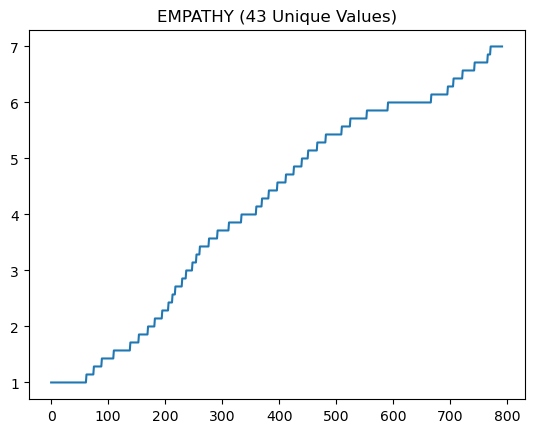

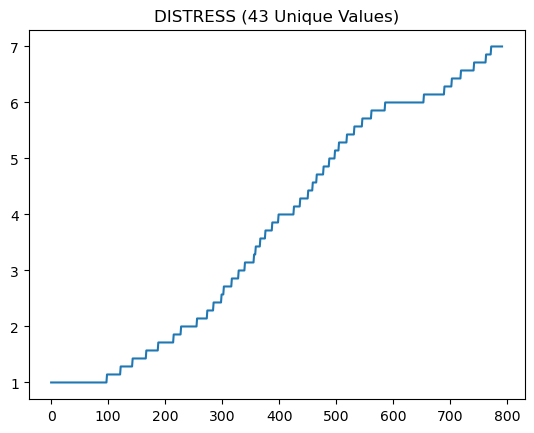

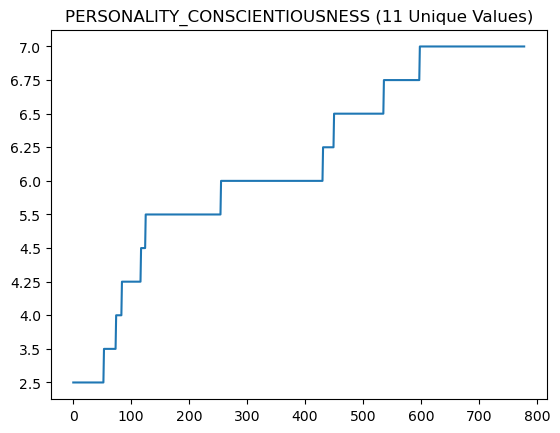

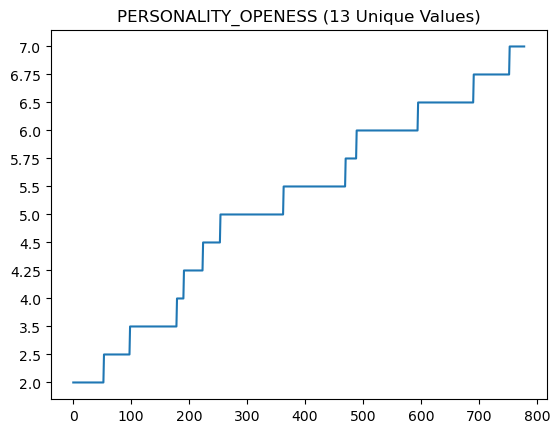

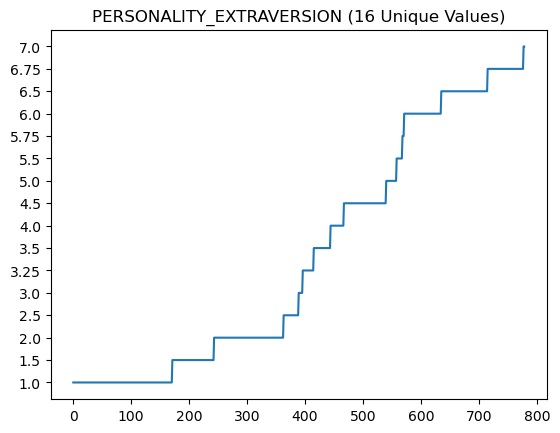

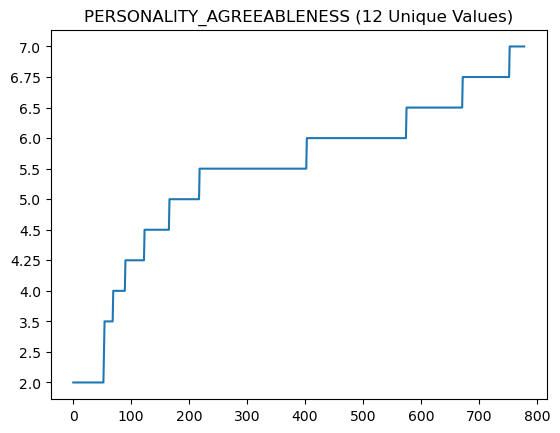

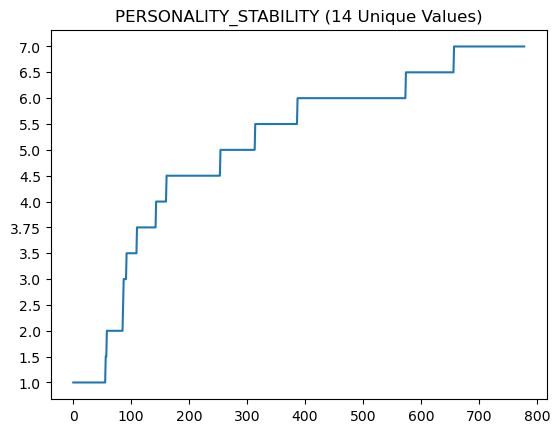

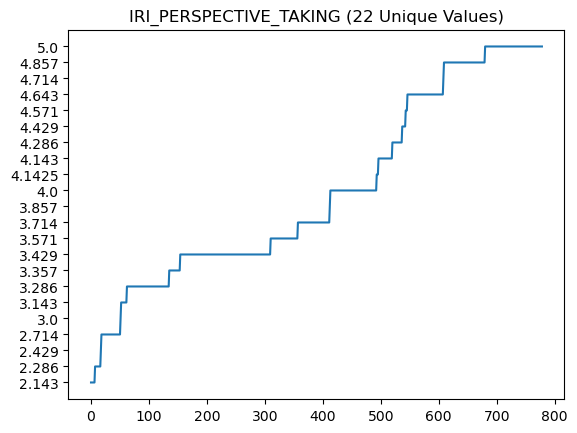

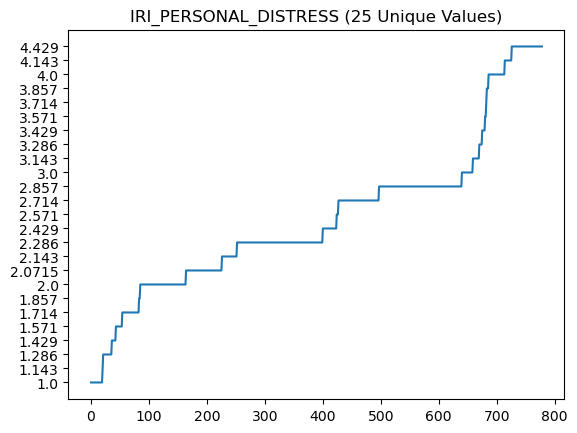

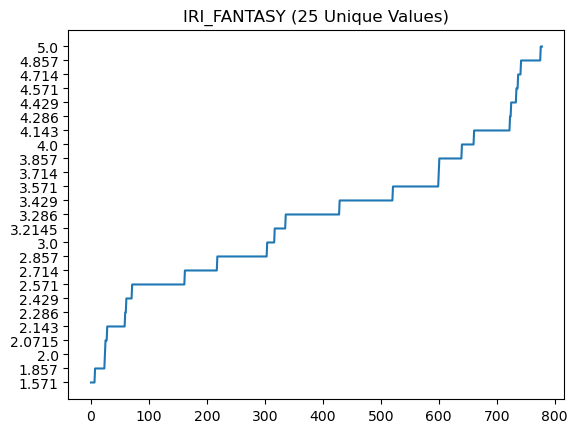

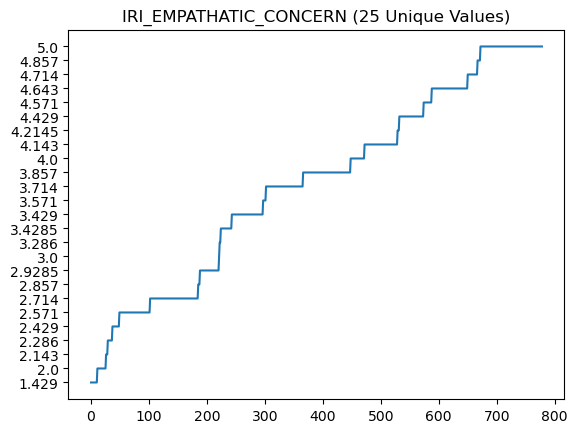

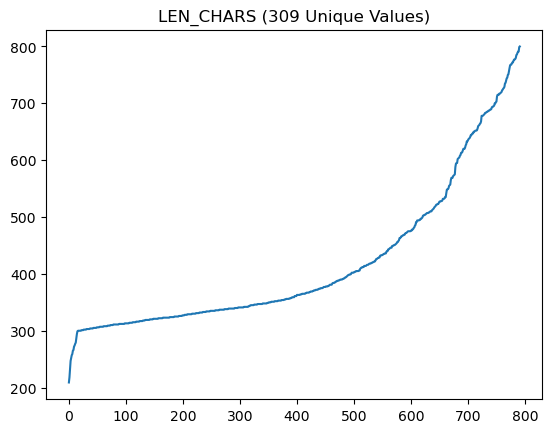

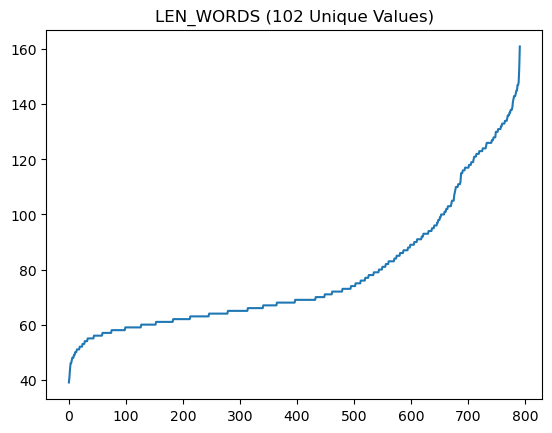

In [22]:
# plot if it makes sense
cols = [ 'empathy', 'distress',  
         'personality_conscientiousness', 'personality_openess', 'personality_extraversion',
         'personality_agreeableness', 'personality_stability',        
         'iri_perspective_taking', 'iri_personal_distress', 'iri_fantasy', 'iri_empathatic_concern',
         'len_chars', 'len_words',
        ]
for col in cols:
    data = sorted([i for i in df_essay_train[col].values if i != 'unknown'])
    plt.plot( data )
    plt.title(f'{col.upper()} ({len(set(data))} Unique Values)')
    plt.show()

In [23]:
df_essay_train['compare'] = df_essay_train['essay'] == df_essay_train['essay_clean']
print(df_essay_train['compare'].value_counts())
for i, j in df_essay_train[ df_essay_train['compare']==False ][['essay', 'essay_clean']].values:
    print('BEFORE CLEANING:\n', i, sep='')
    print('AFTER CLEANING:\n', j, sep='')
    print('\n', '='*75, '\n', sep='')

True     498
False    294
Name: compare, dtype: int64
BEFORE CLEANING:
That's sad.  Regardless of what they find out happened, who was controlling what or if they had drugs in their system or whatever, it's sad.  I don't know that they will find out anything, i just feel like lots of people will turn this into something it's not.  It's unfortunate anytime a young person like this, with the world at their fingertips, loses their life in something that was controllable.
AFTER CLEANING:
That's sad. Regardless of what they find out happened, who was controlling what or if they had drugs in their system or whatever, it's sad. I don't know that they will find out anything, i just feel like lots of people will turn this into something it's not. It's unfortunate anytime a young person like this, with the world at their fingertips, loses their life in something that was controllable.


BEFORE CLEANING:
It sounds like these boys had a really rough life.  I do think we all have personal responsib

* Double spaces, double periods, double dashes, missing period in the end of essay, strip(), `it\'s`
* `Dear friend,                                                               I...` repeated with different competions?
* Some essays have no punctuation
* Insert spaces: `minorities--all`
* `reallllyyy care thaaaat much`

### b) Test

In [27]:
df_essay_test = pd.read_csv( os.path.join(wdir, files[1]), sep='\t' )

In [28]:
df_essay_test.columns

Index(['conversation_id', 'article_id', 'essay', 'speaker_id', 'gender',
       'education', 'race', 'age', 'income', 'speaker_number', 'split',
       'essay_id'],
      dtype='object')

In [29]:
# put similar columns together
cols = [ 'article_id', 'conversation_id', 'speaker_number', 'essay_id', 'speaker_id',                
         'essay', 'split', 'gender', 'education', 'race', 'age', 'income',
         ]
df_essay_test = df_essay_test[cols]

In [31]:
df_essay_test['essay_clean'] = df_essay_test['essay'].apply(clean_text)
df_essay_test['lang'] = df_essay_test['essay_clean'].apply(detect_lang)
df_essay_test['len_chars'] = df_essay_test['essay_clean'].apply( lambda x: len(x) )
df_essay_test['len_words'] = df_essay_test['essay_clean'].apply( lambda x: len(x.split()) )

In [32]:
print(df_essay_test.shape, '\n')
print(df_essay_test.dtypes, '\n')
print(df_essay_test.isna().sum(), 'n')
df_essay_test.head(25)

(208, 16) 

article_id          int64
conversation_id     int64
speaker_number      int64
essay_id            int64
speaker_id          int64
essay              object
split              object
gender              int64
education           int64
race                int64
age                 int64
income              int64
essay_clean        object
lang               object
len_chars           int64
len_words           int64
dtype: object 

article_id         0
conversation_id    0
speaker_number     0
essay_id           0
speaker_id         0
essay              0
split              0
gender             0
education          0
race               0
age                0
income             0
essay_clean        0
lang               0
len_chars          0
len_words          0
dtype: int64 n


,article_id,conversation_id,speaker_number,essay_id,speaker_id,essay,split,gender,education,race,age,income,essay_clean,lang,len_chars,len_words
0,35,1,1,0,68,How sad is it that this kind of pain and suffe...,dev,2,2,1,21,20000,How sad is it that this kind of pain and suffe...,ENGLISH,338,63
1,35,4,1,3,79,The article is kind of tragic and hits close t...,dev,1,6,3,33,64000,The article is kind of tragic and hits close t...,ENGLISH,367,63
2,213,7,1,6,68,"I think that these kinds of stories, are sad, ...",dev,2,2,1,21,20000,"I think that these kinds of stories, are sad, ...",ENGLISH,314,57
3,213,9,1,8,84,It's crazy that random accidents like this hap...,dev,2,4,1,25,55000,It's crazy that random accidents like this hap...,ENGLISH,384,72
4,78,12,1,11,68,This story makes me so so sad.... As someone w...,dev,2,2,1,21,20000,This story makes me so so sad.... As someone w...,ENGLISH,383,76
5,78,15,1,14,70,"After reading the article, my first reaction a...",dev,1,6,1,29,85000,"After reading the article, my first reaction a...",ENGLISH,380,68
6,336,16,1,15,81,I didn't know coal mining had such adverse eff...,dev,1,4,1,30,27000,I didn't know coal mining had such adverse eff...,ENGLISH,361,59
7,336,20,1,19,73,This is very sad. I can't imagine having elep...,dev,2,7,1,38,42000,This is very sad. I can't imagine having eleph...,ENGLISH,358,66
8,281,23,1,22,63,"Guys, reading this article really hits home fo...",dev,1,4,1,25,29000,"Guys, reading this article really hits home fo...",ENGLISH,341,66
9,171,26,1,25,63,Hey guys. So I just read this article about Ir...,dev,1,4,1,25,29000,Hey guys. So I just read this article about Ir...,ENGLISH,416,74


In [33]:
# unique values per column
all_unique = []
for col in df_essay_test.columns:
    all_values = len(df_essay_test[col].values)
    uniques    = len(df_essay_test[col].unique())
    print(f'COLUMN {col}')
    print(f'\tTotal values:  {all_values}')
    print(f'\tUnique values: {uniques}\n')
    if all_values == uniques:
        all_unique.append(col)
print('\nColumns with all unique values:', ', '.join(all_unique))

COLUMN article_id
	Total values:  208
	Unique values: 73

COLUMN conversation_id
	Total values:  208
	Unique values: 104

COLUMN speaker_number
	Total values:  208
	Unique values: 2

COLUMN essay_id
	Total values:  208
	Unique values: 208

COLUMN speaker_id
	Total values:  208
	Unique values: 41

COLUMN essay
	Total values:  208
	Unique values: 208

COLUMN split
	Total values:  208
	Unique values: 1

COLUMN gender
	Total values:  208
	Unique values: 2

COLUMN education
	Total values:  208
	Unique values: 6

COLUMN race
	Total values:  208
	Unique values: 4

COLUMN age
	Total values:  208
	Unique values: 22

COLUMN income
	Total values:  208
	Unique values: 31

COLUMN essay_clean
	Total values:  208
	Unique values: 208

COLUMN lang
	Total values:  208
	Unique values: 1

COLUMN len_chars
	Total values:  208
	Unique values: 126

COLUMN len_words
	Total values:  208
	Unique values: 65


Columns with all unique values: essay_id, essay, essay_clean


In [34]:
# value counts if it makes sense
cols = [ 'article_id', 'conversation_id', 'speaker_number', 'speaker_id',                
         'split', 'gender', 'education', 'race', 'age', 'income', 'lang',
         ]
for col in cols:
    print(f'COLUMN {col}\n')
    print(df_essay_test[col].value_counts())
    print('\n', '='*75, '\n', sep='')

COLUMN article_id

6      6
171    6
331    4
314    4
73     4
147    4
133    4
400    4
283    4
35     4
182    4
92     4
368    4
247    4
213    4
347    4
48     4
31     4
94     4
371    4
353    4
289    4
67     4
72     4
138    4
304    4
233    4
336    4
78     4
80     2
270    2
91     2
163    2
23     2
116    2
66     2
53     2
218    2
292    2
297    2
112    2
13     2
7      2
186    2
11     2
18     2
113    2
139    2
89     2
375    2
281    2
386    2
49     2
3      2
57     2
134    2
45     2
99     2
125    2
302    2
228    2
39     2
313    2
201    2
273    2
128    2
177    2
47     2
370    2
242    2
339    2
291    2
103    2
Name: article_id, dtype: int64


COLUMN conversation_id

1      2
4      2
361    2
352    2
349    2
343    2
328    2
320    2
312    2
310    2
309    2
303    2
302    2
298    2
295    2
278    2
270    2
250    2
234    2
230    2
220    2
219    2
215    2
210    2
204    2
367    2
376    2
381    2
445    2
494   

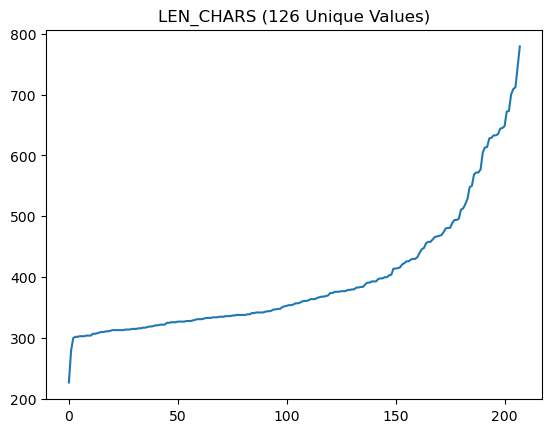

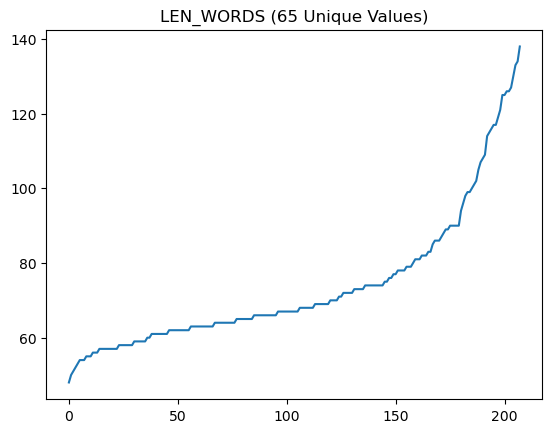

In [35]:
# plot if it makes sense
cols = [ 'len_chars', 'len_words', ]
for col in cols:
    data = sorted([i for i in df_essay_test[col].values if i != 'unknown'])
    plt.plot( data )
    plt.title(f'{col.upper()} ({len(set(data))} Unique Values)')
    plt.show()

* __Different data distributions vs. train set in some columns__? Even if there is, it's not in the length - its distribution is similar to the training set

In [36]:
df_essay_test['compare'] = df_essay_test['essay'] == df_essay_test['essay_clean']
print(df_essay_test['compare'].value_counts())
for i, j in df_essay_test[ df_essay_test['compare']==False ][['essay', 'essay_clean']].values:
    print('BEFORE CLEANING:\n', i, sep='')
    print('AFTER CLEANING:\n', j, sep='')
    print('\n', '='*75, '\n', sep='')

True     105
False    103
Name: compare, dtype: int64
BEFORE CLEANING:
How sad is it that this kind of pain and suffering, and those kind of living conditions still exsist today? what a gap we have in society between developed countries and those that aren't. It's crazy to drive around the US and see all the money people spend on pointless things, and then to think about how the people in Haiti are living. 
AFTER CLEANING:
How sad is it that this kind of pain and suffering, and those kind of living conditions still exsist today? what a gap we have in society between developed countries and those that aren't. It's crazy to drive around the US and see all the money people spend on pointless things, and then to think about how the people in Haiti are living.


BEFORE CLEANING:
I think that these kinds of stories, are sad, yet inspirational and leave you with kind of a good feeling. Even though his story is sad, it's cool and inspiring/motivational to see that he rose up against his circum

* `Dear friend,                                        I...` present here as well. Is this a feature?
* At least once - `around/fell`
* `more details...How did`
* Same as inh the training set

## CONV
### a) Train

In [48]:
dtypes = {'article_id': 'int', 'speaker_id': 'int', 'essay_id': 'int'}
df_conv_train = pd.read_csv( os.path.join(wdir, files[2]), dtype=dtypes, sep='\t' )
print(df_conv_train.shape, '\n')
print(df_conv_train.isna().sum(), '\n')
print(df_conv_train.dtypes, '\n')

(8776, 10) 

conversation_id      0
turn_id              0
text                 0
EmotionalPolarity    0
Emotion              0
Empathy              0
speaker_number       0
article_id           0
speaker_id           0
essay_id             0
dtype: int64 

conversation_id        int64
turn_id                int64
text                  object
EmotionalPolarity    float64
Emotion              float64
Empathy              float64
speaker_number         int64
article_id             int64
speaker_id             int64
essay_id               int64
dtype: object 



In [49]:
df_conv_train['text_clean'] = df_conv_train['text'].apply(clean_text)
df_conv_train['lang'] = df_conv_train['text_clean'].apply(detect_lang)
df_conv_train['len_chars'] = df_conv_train['text_clean'].apply( lambda x: len(x) )
df_conv_train['len_words'] = df_conv_train['text_clean'].apply( lambda x: len(x.split()) )

In [50]:
df_conv_train.head(25)

,conversation_id,turn_id,text,EmotionalPolarity,Emotion,Empathy,speaker_number,article_id,speaker_id,essay_id,text_clean,lang,len_chars,len_words
0,2,0,I feel very sad for the people.,2.0000,3.0000,3.3333,1,35,30,1,I feel very sad for the people.,ENGLISH,31,7
1,2,1,It's terrible. Not only the people but the ani...,2.0000,4.0000,3.3333,2,35,17,501,It's terrible. Not only the people but the ani...,ENGLISH,59,11
2,2,10,I felt really sorry for the sister that now ha...,2.0000,3.6667,2.6667,1,35,30,1,I felt really sorry for the sister that now ha...,ENGLISH,69,14
3,2,11,"Yeah, it's going to be tough but i am sure she...",0.6667,3.0000,2.0000,2,35,17,501,"Yeah, it's going to be tough but i am sure she...",ENGLISH,78,17
4,2,12,"Yeah, we never know what we can do unless we a...",0.3333,2.3333,1.3333,1,35,30,1,"Yeah, we never know what we can do unless we a...",ENGLISH,56,12
5,2,13,True. Have you been in ANY kind of natural dis...,1.0000,1.3333,0.3333,2,35,17,501,True. Have you been in ANY kind of natural dis...,ENGLISH,53,10
6,2,14,Tornado when I was young. They suck too.,2.0000,2.0000,1.6667,1,35,30,1,Tornado when I was young. They suck too.,ENGLISH,40,8
7,2,15,Never been in one but i can only imagine it's ...,1.6667,2.3333,1.6667,2,35,17,501,Never been in one but i can only imagine it's ...,ENGLISH,75,15
8,2,16,The power of nature is truly scary.,1.6667,3.3333,1.3333,1,35,30,1,The power of nature is truly scary.,ENGLISH,35,7
9,2,17,Agree. I hope those people get some water and ...,1.0000,2.6667,3.6667,2,35,17,501,Agree. I hope those people get some water and ...,ENGLISH,70,14


In [51]:
# unique values per column
all_unique = []
for col in df_conv_train.columns:
    all_values = len(df_conv_train[col].values)
    uniques    = len(df_conv_train[col].unique())
    print(f'COLUMN {col}')
    print(f'\tTotal values:  {all_values}')
    print(f'\tUnique values: {uniques}\n')
    if all_values == uniques:
        all_unique.append(col)
print('\nColumns with all unique values:', ', '.join(all_unique))

COLUMN conversation_id
	Total values:  8776
	Unique values: 386

COLUMN turn_id
	Total values:  8776
	Unique values: 42

COLUMN text
	Total values:  8776
	Unique values: 8394

COLUMN EmotionalPolarity
	Total values:  8776
	Unique values: 9

COLUMN Emotion
	Total values:  8776
	Unique values: 16

COLUMN Empathy
	Total values:  8776
	Unique values: 16

COLUMN speaker_number
	Total values:  8776
	Unique values: 2

COLUMN article_id
	Total values:  8776
	Unique values: 100

COLUMN speaker_id
	Total values:  8776
	Unique values: 56

COLUMN essay_id
	Total values:  8776
	Unique values: 772

COLUMN text_clean
	Total values:  8776
	Unique values: 8391

COLUMN lang
	Total values:  8776
	Unique values: 2

COLUMN len_chars
	Total values:  8776
	Unique values: 415

COLUMN len_words
	Total values:  8776
	Unique values: 99


Columns with all unique values: 


In [52]:
# value counts if it makes sense
cols = [ 'conversation_id', 'turn_id', 'EmotionalPolarity', 'Emotion',
         'Empathy', 'speaker_number', 'article_id', 'speaker_id',
         'lang',
       ]
for col in cols:
    print(f'COLUMN {col}\n')
    print(df_conv_train[col].value_counts())
    print('\n', '='*75, '\n', sep='')

COLUMN conversation_id

209    42
51     39
36     36
163    36
47     35
360    34
62     34
231    34
22     34
183    33
287    33
95     32
77     32
197    32
170    32
66     32
158    32
472    32
476    32
42     32
372    32
134    32
21     32
24     31
486    31
496    30
58     30
492    30
27     30
56     30
165    30
212    30
17     30
353    29
342    29
244    29
203    29
364    29
289    29
18     28
293    28
117    28
157    28
239    28
229    27
189    27
267    27
139    27
399    27
120    27
211    27
433    26
223    26
306    26
174    26
140    26
308    26
49     26
149    26
53     26
439    26
258    26
454    26
233    25
108    25
10     25
467    25
217    25
169    25
89     25
276    25
3      25
19     25
208    25
213    25
221    25
393    25
281    24
280    24
253    24
192    24
198    24
242    24
473    24
119    24
235    24
31     24
362    24
46     24
85     24
90     24
483    24
482    24
102    24
103    24
111    24
356    24
122   

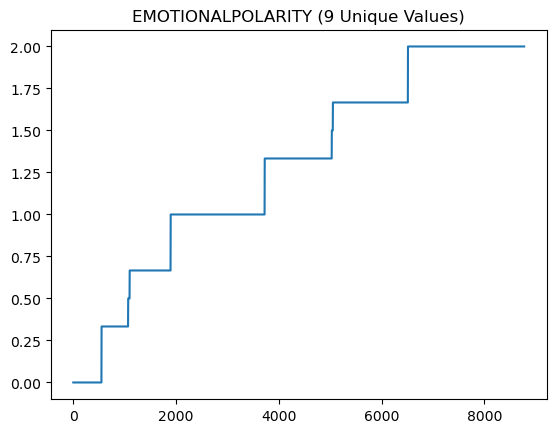

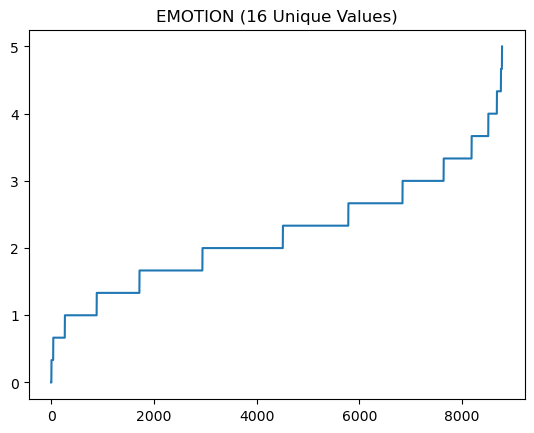

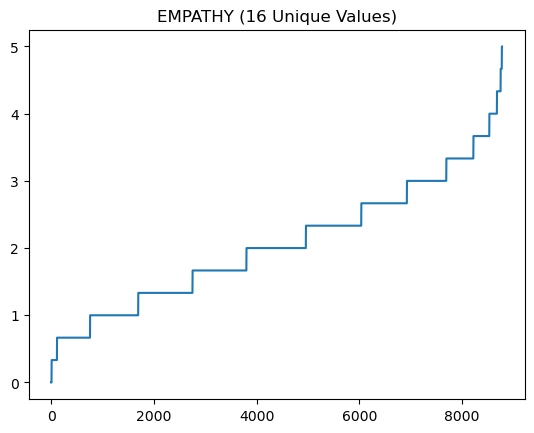

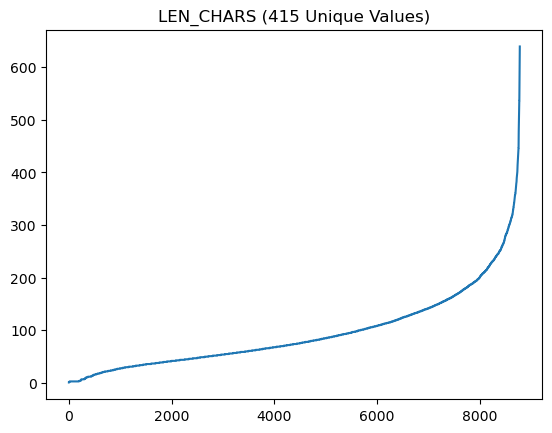

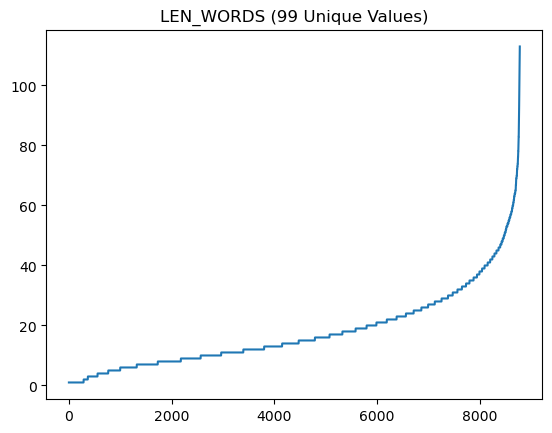

In [53]:
# plot if it makes sense
cols = [ 'EmotionalPolarity', 'Emotion',
         'Empathy', 'len_chars', 'len_words'
        ]
for col in cols:
    data = sorted([i for i in df_conv_train[col].values if i != 'unknown'])
    plt.plot( data )
    plt.title(f'{col.upper()} ({len(set(data))} Unique Values)')
    plt.show()

In [55]:
df_conv_train['compare'] = df_conv_train['text'] == df_conv_train['text_clean']
print(df_conv_train['compare'].value_counts())
for i, j in df_conv_train[ df_conv_train['compare']==False ][['text', 'text_clean']].values[:100]:
    print('BEFORE CLEANING:\n', i, sep='')
    print('AFTER CLEANING:\n', j, sep='')
    print('\n', '='*75, '\n', sep='')

True     7375
False    1401
Name: compare, dtype: int64
BEFORE CLEANING:
i remember  trump throwing toilet paper rolls at the crowd in puerto rico that was so embarrasing
AFTER CLEANING:
i remember trump throwing toilet paper rolls at the crowd in puerto rico that was so embarrasing


BEFORE CLEANING:
It's very sad.   I can't believe in the 21st century that people are still so slow in helping third world countries or even in the US when New Orleans was destroyed.   It makes no sense.
AFTER CLEANING:
It's very sad. I can't believe in the 21st century that people are still so slow in helping third world countries or even in the US when New Orleans was destroyed. It makes no sense.


BEFORE CLEANING:
I follow college basketball like a crazy person.   Skal Labiesse was trapped in the hurricane in this article.   His whole home collapsed on him and he was covered with rock and materials for three days.   His story is so frightening.   He thought he was dying
AFTER CLEANING:
I follow colleg

In [57]:
# unknown language - all short English
set(df_conv_train[ df_conv_train['lang']=='Unknown' ]['text_clean'].values)

{'1',
 '2815897278',
 '7',
 '7924832535',
 '8 hour spinal surgery',
 ':( bye',
 'Agree!',
 'America Fuck YEA!!!',
 'Apparently',
 'Both',
 'Bye',
 'Exactly..',
 'For real??',
 'For sure.',
 'Go on..',
 'Goodbye',
 'Hello',
 'Hello there..',
 'Hi',
 'How so?',
 'I agree',
 'I agree.',
 'I do too',
 'I guess',
 'I guess not',
 'I hope so',
 'I hope so.',
 'I support that',
 "I'm black",
 "I'm not sure.",
 'Indeed',
 'Me too',
 'Me, too.',
 'No',
 'No, it',
 'None yet...',
 'Oh yes',
 'Ohh...my bad',
 'Pardon?',
 'Politics?',
 'Same! bye',
 'So sad',
 'So true.',
 'Spot on!!!!',
 'TRUE',
 'That',
 'That is scary...',
 'That makes sense.',
 "That's good. That's a start.",
 "That's the reality.",
 "That's true.",
 'True, I',
 'What a sad, sad story (:',
 'What a story!',
 'What a tragedy!',
 'Why not?',
 'Yeah been a nice conversation. bye',
 'Yeah this is a human problem.',
 'Yes 100 percent.',
 'You too',
 'You too.',
 'african',
 'against Venezuela?',
 'agreed.',
 'agreed. bye',
 'and te

In [62]:
# short texts
print(df_conv_train[ df_conv_train['len_words']==0 ])
print( set(df_conv_train[ df_conv_train['len_words']==1 ]['text_clean'].values) )

Empty DataFrame
Columns: [conversation_id, turn_id, text, EmotionalPolarity, Emotion, Empathy, speaker_number, article_id, speaker_id, essay_id, text_clean, lang, len_chars, len_words, compare]
Index: []
{'bye.', 'congratulations!', 'Exactly..', 'Goodbye', 'yea', '1', 'hmm', 'TRUE', 'bye!', 'No', 'Hi', 'thanks!', 'idiocracy', 'Both', 'bye', '7', 'yeah', 'lol', 'precious!', 'be', 'Politics?', 'agreed.', 'Agree!', '2815897278', 'yep', 'african', 'Apparently', 'Hello', 'Bye', 'football', '7924832535', 't', 'Pardon?', 'ok', 'yes', 'Indeed', 'That', 'goodbye', 'yea..bye', 'cannabilism'}


Shortest texts are single words - should be OK

### b) Test

In [63]:
dtypes = {'article_id': 'int', 'speaker_id': 'int', 'essay_id': 'int'}
df_conv_test = pd.read_csv( os.path.join(wdir, files[3]), dtype=dtypes, sep='\t' )
print(df_conv_test.shape, '\n')
print(df_conv_test.isna().sum(), '\n')
print(df_conv_test.dtypes, '\n')

(2400, 7) 

conversation_id    0
turn_id            0
text               0
speaker_number     0
article_id         0
speaker_id         0
essay_id           0
dtype: int64 

conversation_id     int64
turn_id             int64
text               object
speaker_number      int64
article_id          int64
speaker_id          int64
essay_id            int64
dtype: object 



In [64]:
df_conv_test['text_clean'] = df_conv_test['text'].apply(clean_text)
df_conv_test['lang'] = df_conv_test['text_clean'].apply(detect_lang)
df_conv_test['len_chars'] = df_conv_test['text_clean'].apply( lambda x: len(x) )
df_conv_test['len_words'] = df_conv_test['text_clean'].apply( lambda x: len(x.split()) )

In [65]:
df_conv_test.head(25)

,conversation_id,turn_id,text,speaker_number,article_id,speaker_id,essay_id,text_clean,lang,len_chars,len_words
0,1,0,what did you think about this article,1,35,68,0,what did you think about this article,ENGLISH,37,7
1,1,1,"It's definitely really sad to read, considerin...",2,35,66,500,"It's definitely really sad to read, considerin...",ENGLISH,105,16
2,1,10,"It is hard to fathom/process, it's hard for me...",1,35,68,0,"It is hard to fathom/process, it's hard for me...",ENGLISH,64,12
3,1,11,"Give it twenty more years, for the more compas...",2,35,66,500,"Give it twenty more years, for the more compas...",ENGLISH,121,21
4,1,12,I think that is a fair statement... the new ge...,1,35,68,0,I think that is a fair statement... the new ge...,ENGLISH,110,19
5,1,13,"I know it sounds cold, but the older generatio...",2,35,66,500,"I know it sounds cold, but the older generatio...",ENGLISH,150,26
6,1,14,I totally agree... I know there are some out t...,1,35,68,0,I totally agree... I know there are some out t...,ENGLISH,124,24
7,1,15,"Well, it was really great talking to you. I ca...",2,35,66,500,"Well, it was really great talking to you. I ca...",ENGLISH,104,20
8,1,16,we don't have enough lines yet,1,35,68,0,we don't have enough lines yet,ENGLISH,30,6
9,1,17,"I apologize, I thought we did! I'm obviously a...",2,35,66,500,"I apologize, I thought we did! I'm obviously a...",ENGLISH,114,20


In [66]:
# unique values per column
all_unique = []
for col in df_conv_test.columns:
    all_values = len(df_conv_test[col].values)
    uniques    = len(df_conv_test[col].unique())
    print(f'COLUMN {col}')
    print(f'\tTotal values:  {all_values}')
    print(f'\tUnique values: {uniques}\n')
    if all_values == uniques:
        all_unique.append(col)
print('\nColumns with all unique values:', ', '.join(all_unique))

COLUMN conversation_id
	Total values:  2400
	Unique values: 101

COLUMN turn_id
	Total values:  2400
	Unique values: 44

COLUMN text
	Total values:  2400
	Unique values: 2298

COLUMN speaker_number
	Total values:  2400
	Unique values: 2

COLUMN article_id
	Total values:  2400
	Unique values: 72

COLUMN speaker_id
	Total values:  2400
	Unique values: 38

COLUMN essay_id
	Total values:  2400
	Unique values: 202

COLUMN text_clean
	Total values:  2400
	Unique values: 2298

COLUMN lang
	Total values:  2400
	Unique values: 3

COLUMN len_chars
	Total values:  2400
	Unique values: 332

COLUMN len_words
	Total values:  2400
	Unique values: 82


Columns with all unique values: 


In [68]:
# value counts if it makes sense
cols = [ 'conversation_id', 'turn_id', 'speaker_number', 'article_id', 'speaker_id', 'lang', ]
for col in cols:
    print(f'COLUMN {col}\n')
    print(df_conv_test[col].value_counts())
    print('\n', '='*75, '\n', sep='')

COLUMN conversation_id

84     44
387    34
93     34
23     34
16     34
412    33
278    33
44     33
52     33
381    32
26     32
28     32
82     32
178    32
173    31
4      31
127    31
478    28
106    28
12     27
343    26
396    25
45     25
312    25
423    24
180    24
298    24
159    24
302    24
230    24
309    24
215    24
459    24
57     24
497    24
121    24
115    24
7      24
403    24
101    24
67     24
133    23
34     23
96     23
376    23
406    23
449    22
352    22
456    22
1      22
404    22
210    22
143    22
29     22
68     22
86     22
201    22
137    22
164    22
462    22
175    22
151    21
494    21
409    21
391    21
92     21
104    21
361    21
130    21
135    21
425    21
431    21
471    21
445    20
451    20
484    20
455    20
220    20
400    20
219    20
15     20
20     20
59     20
123    20
144    20
146    20
150    20
367    20
194    20
234    20
250    20
270    20
295    20
303    20
310    20
320    20
349    20
9     

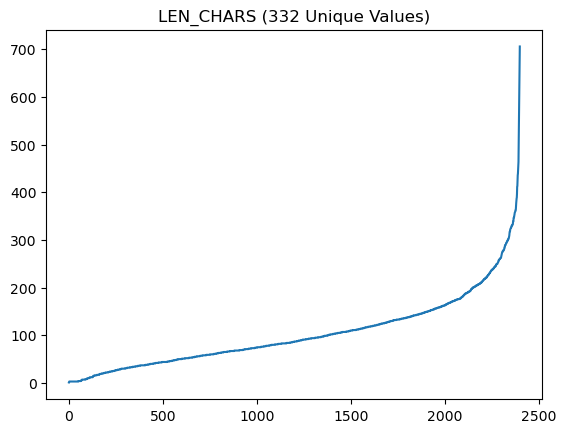

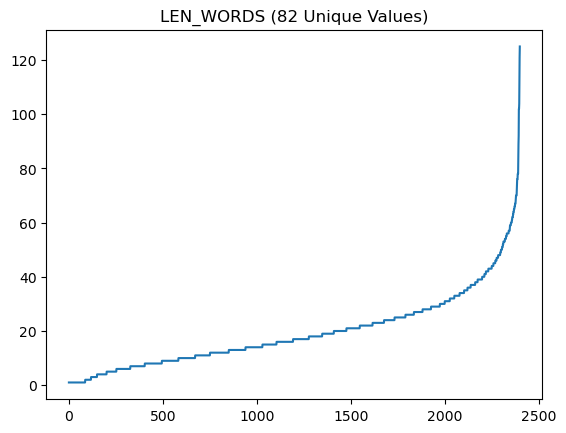

In [70]:
# plot if it makes sense
cols = [ 'len_chars', 'len_words', ]
for col in cols:
    data = sorted([i for i in df_conv_test[col].values if i != 'unknown'])
    plt.plot( data )
    plt.title(f'{col.upper()} ({len(set(data))} Unique Values)')
    plt.show()

In [71]:
df_conv_test['compare'] = df_conv_test['text'] == df_conv_test['text_clean']
print(df_conv_test['compare'].value_counts())
for i, j in df_conv_test[ df_conv_test['compare']==False ][['text', 'text_clean']].values[:100]:
    print('BEFORE CLEANING:\n', i, sep='')
    print('AFTER CLEANING:\n', j, sep='')
    print('\n', '='*75, '\n', sep='')

True     2256
False     144
Name: compare, dtype: int64
BEFORE CLEANING:
Me too.. I also can't imagine living in the poverty and such.. It's crazy to think that people still live like that sometimes.  The gap between first world countires and places like that is crazy to em
AFTER CLEANING:
Me too.. I also can't imagine living in the poverty and such.. It's crazy to think that people still live like that sometimes. The gap between first world countires and places like that is crazy to em


BEFORE CLEANING:
Yes, unfortunately.  It's very easy to have children but not so easy to raise them well.
AFTER CLEANING:
Yes, unfortunately. It's very easy to have children but not so easy to raise them well.


BEFORE CLEANING:
Absolutely, I agree.  I think if you have children you owe them that.  And most people resent their parents enough you'd think they'd try harder with their own kids.  But few do.
AFTER CLEANING:
Absolutely, I agree. I think if you have children you owe them that. And most peop

In [72]:
# unknown language - all short English
set(df_conv_test[ df_conv_test['lang']=='Unknown' ]['text_clean'].values)

{'7',
 'BYE',
 'For sure....',
 'Ha! Me too.',
 'Hello',
 'Hi',
 'How so?',
 'I agree',
 "I don't",
 'I see.',
 'Same here.',
 'TRUE',
 'That sukcs...',
 'That would help',
 "That's cool! haha",
 'Totally',
 'True that.',
 'Yeah bombing are scary.',
 'Yes I do.',
 'Yes me too',
 'Yup. bye',
 'bye',
 'bye !',
 'bye!',
 'exactly',
 'goodbye',
 'goodbye!',
 'goodbye.',
 'haha yup',
 'i see',
 'like what?',
 'me too',
 'me too....',
 'poor kitten',
 'probably deliberate',
 'sorry caps was on. bye',
 'sorry, bye',
 "that's true",
 'vye',
 'what war?',
 'wow, really',
 'yeah..bye',
 'yes'}

In [73]:
# INDONESIAN - all short English
set(df_conv_test[ df_conv_test['lang']=='INDONESIAN' ]['text_clean'].values)

{'yah exatly', 'yah thats true'}

In [74]:
# short texts
print(df_conv_test[ df_conv_test['len_words']==0 ])
print( set(df_conv_test[ df_conv_test['len_words']==1 ]['text_clean'].values) )

Empty DataFrame
Columns: [conversation_id, turn_id, text, speaker_number, article_id, speaker_id, essay_id, text_clean, lang, len_chars, len_words, compare]
Index: []
{'7', 'Hello', 'BYE', 'TRUE', 'goodbye!', 'yeah..bye', 'bye!', 'goodbye.', 'Hi', 'yes', 'vye', 'Totally', 'exactly', 'goodbye', 'bye'}


Shortest texts are single words - should be OK

## ARTICLES

In [ ]:
# repeated cell from start of notebook - for clarity
wdir  = 'data'
files = [ 'WASSA23_essay_level_with_labels_train.tsv', 'WASSA23_essay_level_dev.tsv',
          'WASSA23_conv_level_with_labels_train.tsv', 'WASSA23_conv_level_dev.tsv',
          'articles_adobe_AMT.csv', 'goldstandard_CONV_dev.tsv', 'goldstandard_dev.tsv', ]

In [75]:
#dtypes = {'article_id': 'int', 'speaker_id': 'int', 'essay_id': 'int'}
df_art = pd.read_csv( os.path.join(wdir, files[4]), )
print(df_art.shape, '\n')
print(df_art.isna().sum(), '\n')
print(df_art.dtypes, '\n')

(418, 2) 

article_id    0
text          0
dtype: int64 

article_id     int64
text          object
dtype: object 



In [78]:
df_art['text_clean'] = df_art['text'].apply(clean_text)
df_art['lang']       = df_art['text_clean'].apply(detect_lang)
df_art['len_chars']  = df_art['text_clean'].apply( lambda x: len(x) )
df_art['len_words']  = df_art['text_clean'].apply( lambda x: len(x.split()) )

In [79]:
df_art.head(25)

,article_id,text,text_clean,lang,len_chars,len_words
0,1,'Abhorrent' bottle attack on young Rangers fan...,'Abhorrent' bottle attack on young Rangers fan...,ENGLISH,2395,413
1,2,'Afghan Girl' in iconic National Geographic ph...,'Afghan Girl' in iconic National Geographic ph...,ENGLISH,2523,413
2,3,'My whole family has been wiped out': Victims ...,'My whole family has been wiped out': Victims ...,ENGLISH,7606,1294
3,4,'RHONY' STAR JULES WAINSTEIN Estranged Husband...,'RHONY' STAR JULES WAINSTEIN Estranged Husband...,ENGLISH,1113,197
4,5,'Swam for their life': More survivors of Levia...,'Swam for their life': More survivors of Levia...,ENGLISH,3593,600
5,6,"'They Were Just Like Us, and They Lost Everyth...","'They Were Just Like Us, and They Lost Everyth...",ENGLISH,11148,1851
6,7,"'This isn't Pompeii, this is Aleppo' — As 200...","'This isn't Pompeii, this is Aleppo' — As 200 ...",ENGLISH,1652,284
7,8,'This was a sad but avoidable tragedy'; kennel...,'This was a sad but avoidable tragedy'; kennel...,ENGLISH,4883,817
8,9,"'Utter devastation' after major quake, aftersh...","'Utter devastation' after major quake, aftersh...",ENGLISH,5308,870
9,10,"1 Police Officer Dead, 1 Wounded After Western...","1 Police Officer Dead, 1 Wounded After Western...",ENGLISH,1960,328


In [81]:
df_art['lang'].value_counts()

ENGLISH    418
Name: lang, dtype: int64

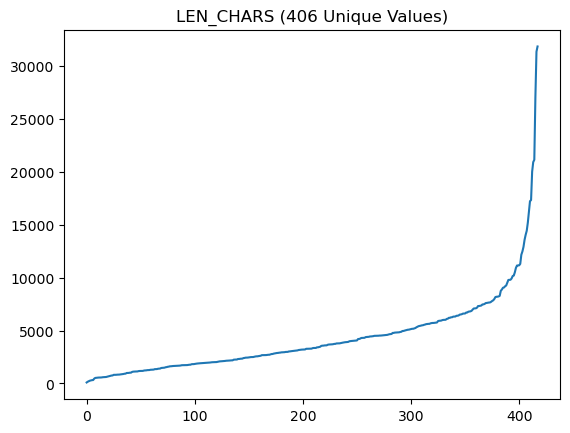

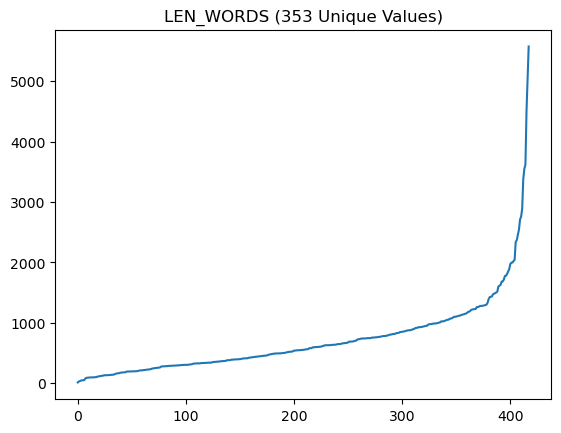

In [82]:
cols = [ 'len_chars', 'len_words', ]
for col in cols:
    data = sorted([i for i in df_art[col].values])
    plt.plot( data )
    plt.title(f'{col.upper()} ({len(set(data))} Unique Values)')
    plt.show()

In [80]:
df_art['compare'] = df_art['text'] == df_art['text_clean']
print(df_art['compare'].value_counts())
for i, j in df_art[ df_art['compare']==False ][['text', 'text_clean']].values[:25]:
    print('BEFORE CLEANING:\n', i, sep='')
    print('AFTER CLEANING:\n', j, sep='')
    print('\n', '='*75, '\n', sep='')

False    418
Name: compare, dtype: int64
BEFORE CLEANING:
'Abhorrent' bottle attack on young Rangers fan before Celtic game —  Police have described a bottle attack on an 11-year-old Rangers fan before Sunday's League Cup semi-final game with Celtic as "abhorrent". Kraig Mackay suffered a large cut to his head after being hit by the bottle while walking in Aitkenhead Road, Glasgow, at about 14:00 on Sunday. Pictures on social media showed Kraig with a large gash and a bandage on his head. Police have appealed for help to find the person responsible. The boy was walking with his family and a number of other Rangers fans when a bottle was thrown at the group. It struck the 11-year-old on the head and he was taken by ambulance to the Royal Hospital for Children where he was treated for a large cut and later released. 'Totally unacceptable' Police Scotland Ch Supt Brian McInulty said: "The incident involving the assault of the 11-year-old boy whilst he was walking to the game is completely

In [85]:
# short texts
print(df_art[ df_art['len_words']==0 ])
print( set(df_art[ df_art['len_words']==1 ]['text_clean'].values) )

Empty DataFrame
Columns: [article_id, text, text_clean, lang, len_chars, len_words, compare]
Index: []
set()


In [89]:
df_art[ df_art['len_words'] < 50 ]

,article_id,text,text_clean,lang,len_chars,len_words,compare
35,36,Actor killed in talk show host's home — Canad...,Actor killed in talk show host's home — Canadi...,ENGLISH,216,36,False
62,63,Article Title: — ﻿Article Title: Article U...,Article Title: — Article Title: Article URL: A...,ENGLISH,90,13,False
73,74,Boy stuck in well for days found dead — A 6-y...,Boy stuck in well for days found dead — A 6-ye...,ENGLISH,161,30,False
250,251,Players will struggle to sleep tonight - Broad...,Players will struggle to sleep tonight - Broad...,ENGLISH,260,49,False
254,255,"Police spokesman says 1 person dead, 7 injured...","Police spokesman says 1 person dead, 7 injured...",ENGLISH,316,48,False
374,375,Visitors bring trouble to Norway's polar bears...,Visitors bring trouble to Norway's polar bears...,ENGLISH,283,46,False


Not too many short texts, and the short ones are not that short

## GOLD CONV

In [98]:
colnames=['EmotionalPolarity', 'Emotion', 'Empathy',] 
df_gold_conv = pd.read_csv( os.path.join(wdir, files[5]), names=colnames, sep='\t')
print(df_conv_test.shape)
print(df_gold_conv.shape, '\n')
print(df_gold_conv.isna().sum(), '\n')
print(df_gold_conv.dtypes, '\n')

(2400, 12)
(2400, 3) 

EmotionalPolarity    0
Emotion              0
Empathy              0
dtype: int64 

EmotionalPolarity    float64
Emotion              float64
Empathy              float64
dtype: object 



__Same number of rows as in the conv_test file. Hopefully column are the same order as in the training file?__

In [99]:
df_gold_conv.head(25)

,EmotionalPolarity,Emotion,Empathy
0,1.0000,0.6667,0.6667
1,2.0000,3.0000,4.3333
2,2.0000,2.6667,4.0000
3,0.0000,2.3333,3.6667
4,0.3333,1.6667,2.6667
5,2.0000,2.3333,2.6667
6,1.6667,2.6667,3.3333
7,0.6667,2.0000,0.6667
8,0.6667,1.0000,0.6667
9,0.6667,1.3333,1.6667


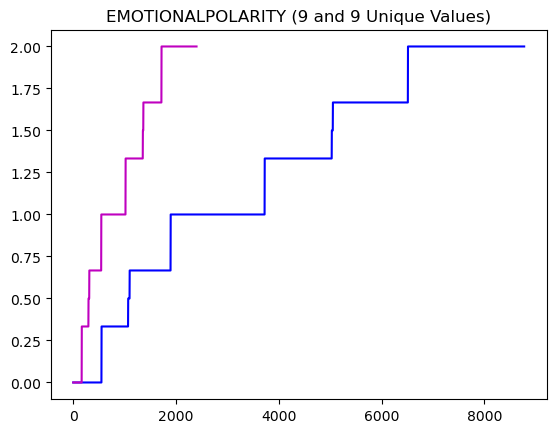

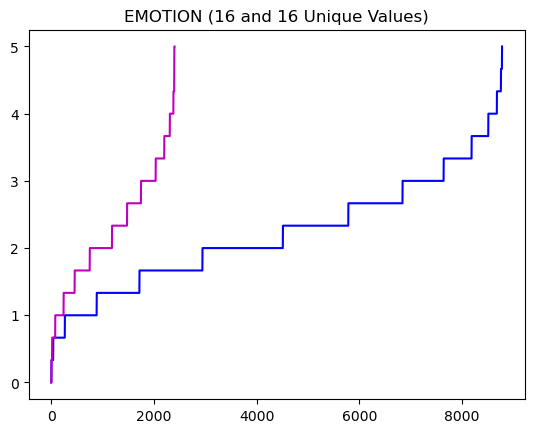

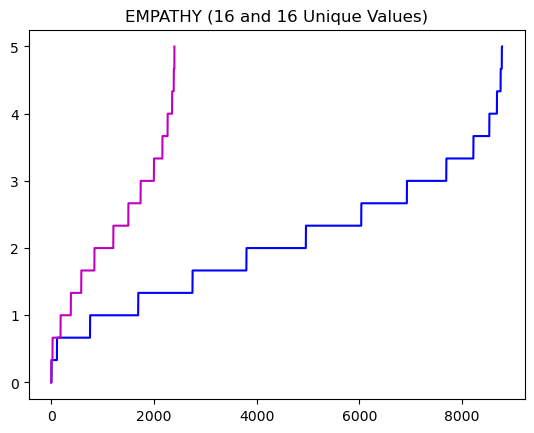

In [100]:
# sanity check
cols = [ 'EmotionalPolarity', 'Emotion', 'Empathy', ]
for col in cols:
    data1 = sorted([i for i in df_conv_train[col].values])
    data2 = sorted([i for i in df_gold_conv[col].values])
    plt.plot( data1, c='b', label='Training' )
    plt.plot( data2, c='m', label='Golden' )
    plt.title(f'{col.upper()} ({len(set(data1))} and {len(set(data2))} Unique Values)')
    plt.show()

# GOLD

In [120]:
colnames=[ 'empathy', 'distress', 'emotion', 'personality_conscientiousness', 'personality_openess',
           'personality_extraversion', 'personality_agreeableness',
           'personality_stability', 'iri_perspective_taking',
           'iri_personal_distress', 'iri_fantasy', 'iri_empathatic_concern', ] 
print(len(colnames))
df_gold = pd.read_csv( os.path.join(wdir, files[6]), names=colnames, sep='\t')
print(df_essay_test.shape)
print(df_gold.shape, '\n')
print(df_gold.isna().sum(), '\n')
print(df_gold.dtypes, '\n')
df_gold.head(25)

12
(208, 17)
(208, 12) 

empathy                          0
distress                         0
emotion                          0
personality_conscientiousness    0
personality_openess              0
personality_extraversion         0
personality_agreeableness        0
personality_stability            0
iri_perspective_taking           0
iri_personal_distress            0
iri_fantasy                      0
iri_empathatic_concern           0
dtype: int64 

empathy                          float64
distress                         float64
emotion                           object
personality_conscientiousness    float64
personality_openess              float64
personality_extraversion         float64
personality_agreeableness        float64
personality_stability            float64
iri_perspective_taking           float64
iri_personal_distress            float64
iri_fantasy                      float64
iri_empathatic_concern           float64
dtype: object 



,empathy,distress,emotion,personality_conscientiousness,personality_openess,personality_extraversion,personality_agreeableness,personality_stability,iri_perspective_taking,iri_personal_distress,iri_fantasy,iri_empathatic_concern
0,3.857143,3.285714,Sadness,5.00,3.00,5.00,4.00,3.5,2.714,3.0000,3.143,3.286
1,2.714286,1.000000,Sadness,6.50,7.00,3.50,4.50,7.0,3.714,1.0000,2.429,1.429
2,3.714286,4.428571,Sadness,5.00,3.00,5.00,4.00,3.5,2.714,3.0000,3.143,3.286
3,3.000000,2.428571,Neutral,5.50,5.50,3.50,4.50,4.0,3.571,2.8570,3.571,3.143
4,3.428571,3.428571,Sadness,5.00,3.00,5.00,4.00,3.5,2.714,3.0000,3.143,3.286
5,2.000000,1.000000,Sadness,6.75,6.75,6.75,6.75,7.0,4.643,2.0715,4.143,4.643
6,6.000000,6.000000,Neutral,3.00,4.00,6.00,6.00,6.5,3.429,2.8570,4.571,4.000
7,2.285714,1.000000,Sadness,7.00,3.50,6.50,5.50,6.5,3.429,2.7140,2.571,3.857
8,4.142857,5.571429,Sadness,6.00,6.00,5.50,6.50,3.0,4.857,3.1430,2.571,4.857
9,3.428571,2.285714,Neutral,6.00,6.00,5.50,6.50,3.0,4.857,3.1430,2.571,4.857


In [121]:
# for comparison
df_essay_train.head(25)

,article_id,conversation_id,speaker_number,essay_id,idx,speaker_id,essay,split,gender,education,race,age,income,empathy,distress,emotion,personality_conscientiousness,personality_openess,personality_extraversion,personality_agreeableness,personality_stability,iri_perspective_taking,iri_personal_distress,iri_fantasy,iri_empathatic_concern,essay_clean,lang,len_chars,len_words,compare
0,35,2,1,1,35_2_person1_1,30,It breaks my heart to see people living in tho...,train,1,6,3,37,40000,6.714286,6.714286,"[Hope, Sadness]",7.0,5.5,1.0,6.5,6.0,4.857,2.0,3.429,5.0,It breaks my heart to see people living in tho...,ENGLISH,414,87,True
1,35,3,1,2,35_3_person1_2,19,I wonder why there aren't more people trying t...,train,1,6,2,32,35000,5.857143,6.000000,[Anger],5.5,5.0,2.0,5.5,4.5,3.429,2.857,2.857,2.714,I wonder why there aren't more people trying t...,ENGLISH,348,63,True
2,35,5,1,4,35_5_person1_4,17,"After reading the article, you can't help but ...",train,1,6,1,29,85000,1.000000,1.428571,[Sadness],6.75,6.75,6.75,6.75,7.0,4.643,2.0715,4.143,4.643,"After reading the article, you can't help but ...",ENGLISH,356,69,True
3,213,6,1,5,213_6_person1_5,16,It is so sad that someone who had such an amaz...,train,2,5,1,28,50000,6.000000,6.857143,[Sadness],6.0,6.0,5.0,4.5,3.5,5.0,4.143,4.857,5.0,It is so sad that someone who had such an amaz...,ENGLISH,321,67,True
4,213,8,1,7,213_8_person1_7,30,"From reading the article, it looks like the wo...",train,1,6,3,37,40000,6.000000,1.000000,[Neutral],7.0,5.5,1.0,6.5,6.0,4.857,2.0,3.429,5.0,"From reading the article, it looks like the wo...",ENGLISH,323,62,True
5,213,10,1,9,213_10_person1_9,49,That's sad. Regardless of what they find out ...,train,1,5,1,31,82000,1.571429,1.142857,[Sadness],3.5,2.5,2.0,4.5,5.0,3.571,2.286,1.857,2.0,That's sad. Regardless of what they find out h...,ENGLISH,398,70,False
6,78,11,1,10,78_11_person1_10,17,"After reading the article, my reaction is that...",train,1,6,1,29,85000,1.428571,1.000000,[Sadness],6.75,6.75,6.75,6.75,7.0,4.643,2.0715,4.143,4.643,"After reading the article, my reaction is that...",ENGLISH,345,67,True
7,78,13,1,12,78_13_person1_12,24,It sounds like these boys had a really rough l...,train,2,7,1,38,42000,1.857143,1.000000,[Sadness],7.0,3.5,6.5,5.5,6.5,3.429,2.714,2.571,3.857,It sounds like these boys had a really rough l...,ENGLISH,450,87,False
8,78,14,1,13,78_14_person1_13,43,This is a tragic and sad story about how some ...,train,2,6,1,33,110000,5.571429,3.000000,[Sadness],7.0,4.5,1.5,7.0,7.0,4.286,1.286,3.857,4.0,This is a tragic and sad story about how some ...,ENGLISH,348,64,True
9,336,17,1,16,336_17_person1_16,31,Hello. I feel really terrible about the curren...,train,unknown,unknown,unknown,unknown,unknown,6.142857,1.000000,"[Disgust, Sadness]",unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Hello. I feel really terrible about the curren...,ENGLISH,356,60,False


__Number of rows in `df_essay_test` and `df_gold` coincide. The order of columns is taken from `df_essay_train` before the order of columns was modified in `df_essay_train`. One exception: `emotion` is the last column there, so I had to move it to the third position if `df_gold`. Hopefully, the `empathy`, `distress`, various `personality` and various `iri` columns are in the same order in both files?__

COLUMN: EMPATHY
Min/Max in df_essay_train: 1.0/7.0
Min/Max in df_gold: 1.0/7.0


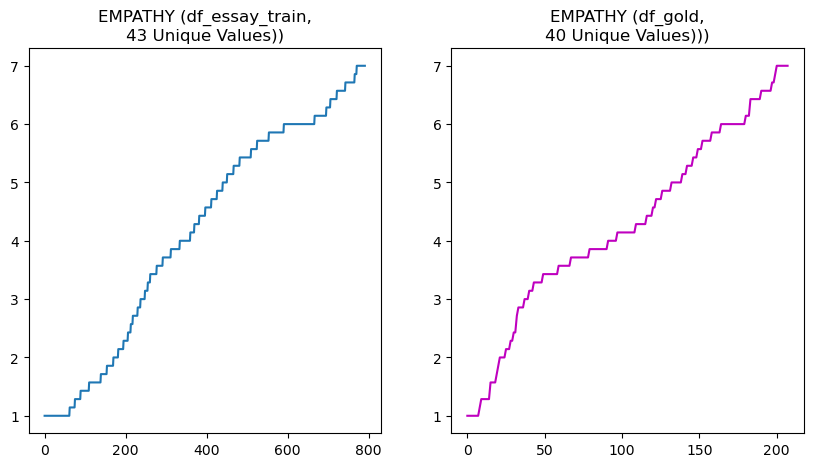

COLUMN: DISTRESS
Min/Max in df_essay_train: 1.0/7.0
Min/Max in df_gold: 1.0/7.0


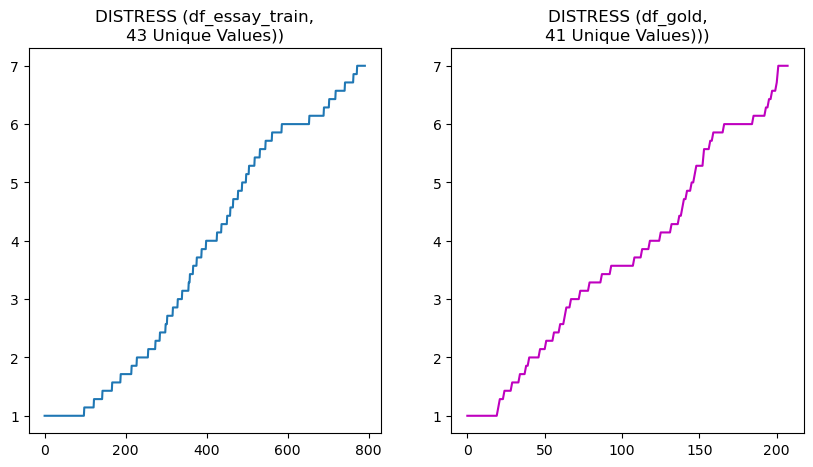

COLUMN: PERSONALITY_CONSCIENTIOUSNESS
Min/Max in df_essay_train: 2.5/7.0
Min/Max in df_gold: 2.5/7.0


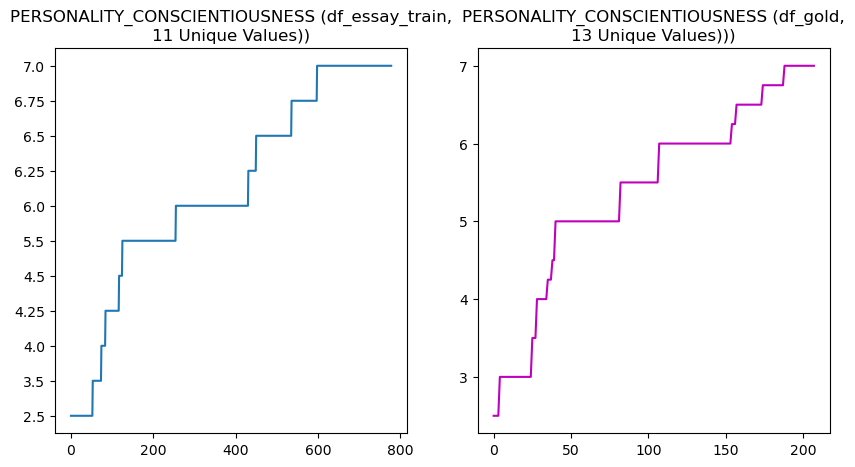

COLUMN: PERSONALITY_OPENESS
Min/Max in df_essay_train: 2.0/7.0
Min/Max in df_gold: 2.0/7.0


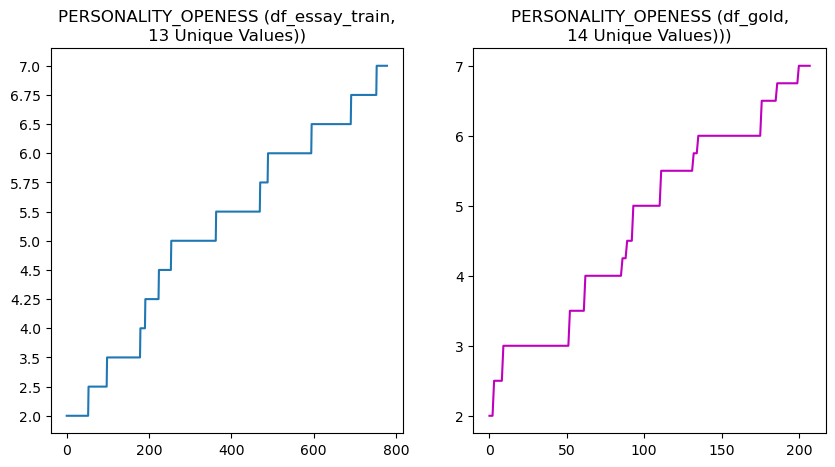

COLUMN: PERSONALITY_EXTRAVERSION
Min/Max in df_essay_train: 1.0/7.0
Min/Max in df_gold: 1.0/7.0


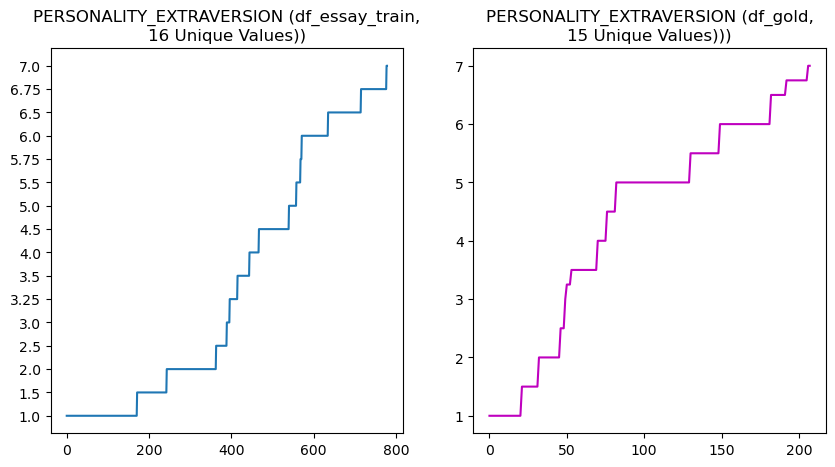

COLUMN: PERSONALITY_AGREEABLENESS
Min/Max in df_essay_train: 2.0/7.0
Min/Max in df_gold: 2.0/7.0


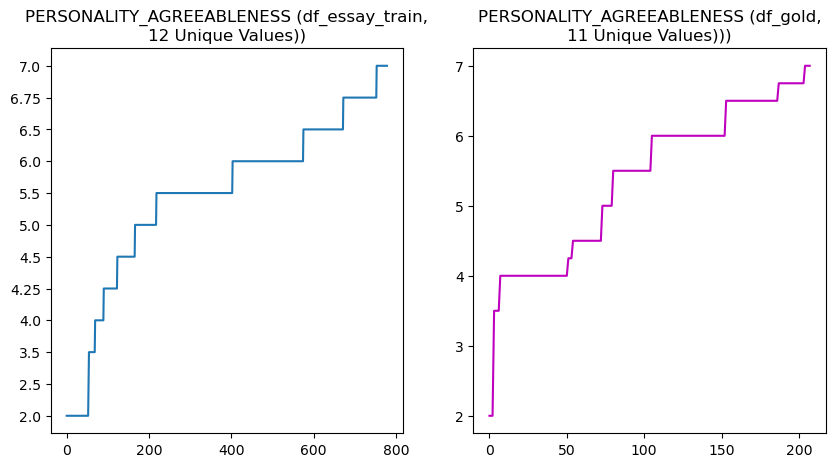

COLUMN: PERSONALITY_STABILITY
Min/Max in df_essay_train: 1.0/7.0
Min/Max in df_gold: 1.0/7.0


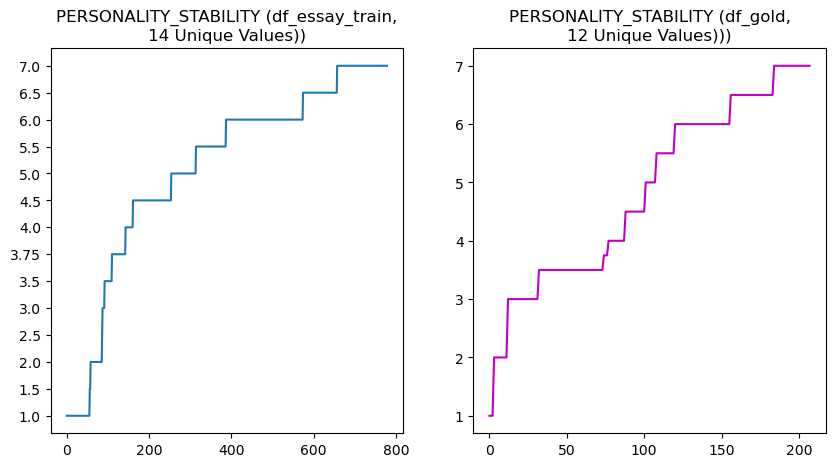

COLUMN: IRI_PERSPECTIVE_TAKING
Min/Max in df_essay_train: 2.143/5.0
Min/Max in df_gold: 1.857/5.0


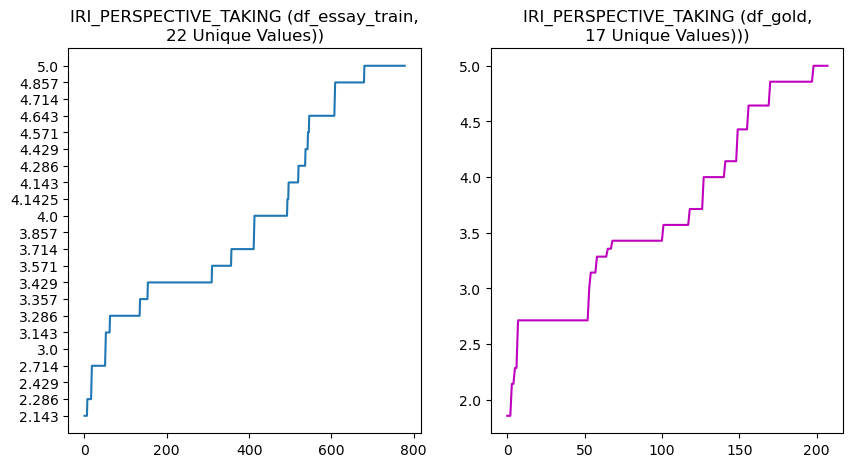

COLUMN: IRI_PERSONAL_DISTRESS
Min/Max in df_essay_train: 1.0/4.429
Min/Max in df_gold: 1.0/4.429


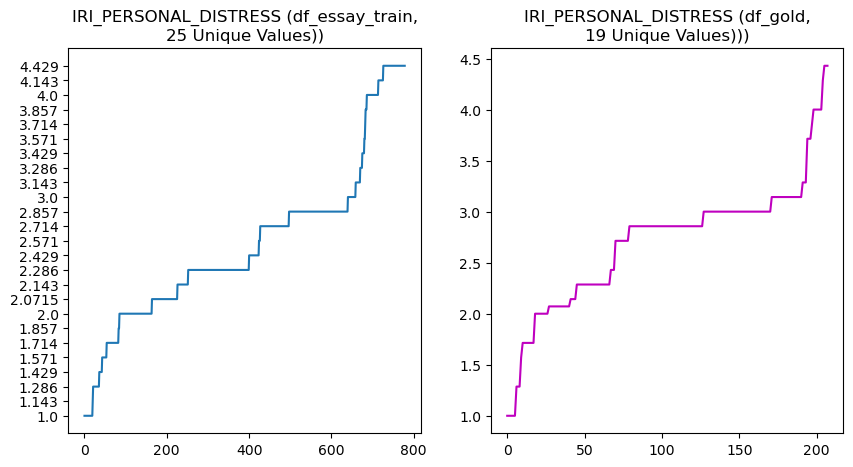

COLUMN: IRI_FANTASY
Min/Max in df_essay_train: 1.571/5.0
Min/Max in df_gold: 1.571/4.857


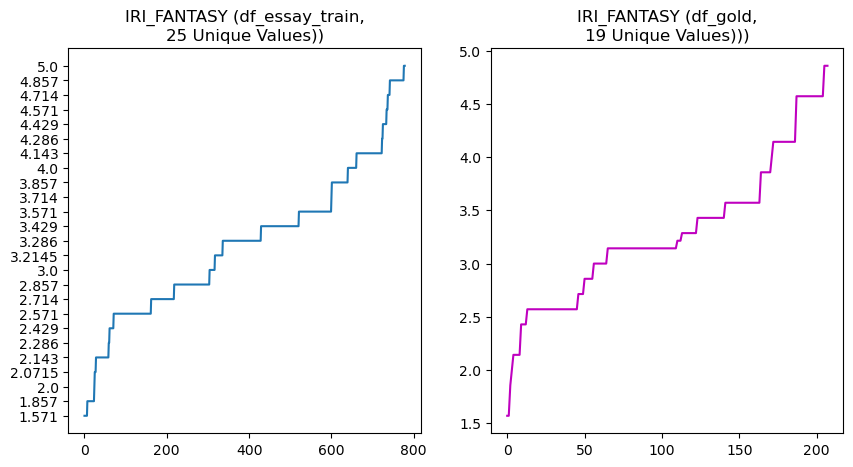

COLUMN: IRI_EMPATHATIC_CONCERN
Min/Max in df_essay_train: 1.429/5.0
Min/Max in df_gold: 1.429/5.0


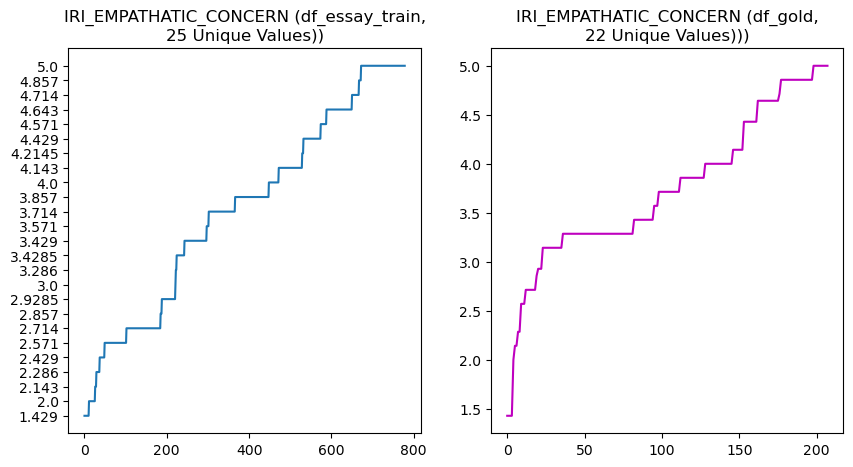

In [135]:
# sanity check
for col in colnames:
    if col == 'emotion':
        continue
    print('COLUMN:', col.upper())
    print(f"Min/Max in df_essay_train: { df_essay_train[ df_essay_train[col]!='unknown' ][col].min() }/{df_essay_train[ df_essay_train[col]!='unknown' ][col].max()}")
    print(f'Min/Max in df_gold: { df_gold[col].min() }/{df_gold[col].max()}')
    
    data1 = sorted([i for i in df_essay_train[col].values if i != 'unknown'])
    data2 = sorted([i for i in df_gold[col].values if i != 'unknown'])

    figure, axis = plt.subplots(1, 2, figsize=(10, 5))

    # For Sine Function
    axis[0].plot(data1)
    axis[0].set_title(f"{col.upper()} (df_essay_train,\n{len(set(data1))} Unique Values))")

    # For Cosine Function
    axis[1].plot(data2, c='m')
    axis[1].set_title(f"{col.upper()} (df_gold,\n{len(set(data2))} Unique Values)))")
    plt.show()